### Clustering and PCA Analysis on the Dataset to findout the Under Developed Countries based on socio economic features and to report to the CEO of Help International Company...

Importing the necessary libraries ...

In [1]:
# Importing necessary libraries and packages...
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing sklearn library and its packages...
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Importing scipy library and its packages...
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# Reading the data...
Countries=pd.read_csv("Country-data.csv")

### EDA Analysis...

In [5]:
# Shape of the dataset...
Countries.shape

(167, 10)

In [6]:
# Info of the dataset to know columns and its type...
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# First five rows of the datasets..
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Checking for Null values...

In [8]:
# Checking for number of null values...
Countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values in the dataset.

#### Checking for duplicate values...

In [9]:
# Checking for duplicates...

Countries.loc[Countries.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


There are no duplicate values in the given data set.

In [10]:
# Datatype check
Countries.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

All columns are consistent and need not to be modified.

 Since few columns are in percentages, they need to be converted into absolute values ...But we don't have either Total GDP or population data we can leave them as it is and they will be handled while scaling only or we can convert them into absolute values by using gdpp instead of total gdp.

Since total gdp is not there if we use gdpp as the data, these columns can be converted into absolute values by following method:

In [11]:
# Converting exports,imports and health spending percentages to absolute values.

Countries['exports'] = Countries['exports'] * Countries['gdpp']/100
Countries['imports'] = Countries['imports'] * Countries['gdpp']/100
Countries['health'] = Countries['health'] * Countries['gdpp']/100

In [12]:
# Dataset after converting into absolute values...
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Checking for Outliers in the dataset...

In [13]:
# 'Describe' to understand about the outliers...
Countries.describe([.01,.05,.25,.75,0.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [14]:
# Columns of the dataframe...
Countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

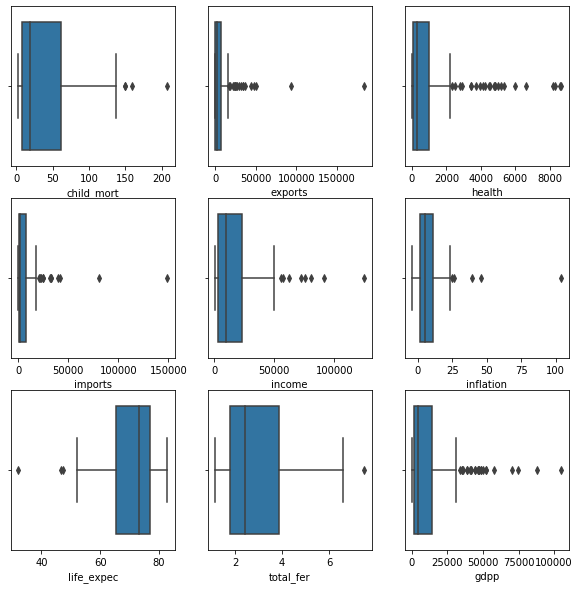

In [15]:
# Boxplots for the Numerical data

var=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(10,10))
for i,j in enumerate(var):
    plt.subplot(3,3,i+1)
    sns.boxplot(Countries[j])
plt.show() 

Outliers are present for all the features.

#### Outlier Treatment...

Since we have to find underdeveloped countries removing outlier for the lower quartile is not right.So,we cap them.The higher quartile any way will form a cluster as there are decent enoughto make a cluster and caping them will not effect as they fall into the higher category of the cluster.

In [16]:
# As we can see there are a number of outliers in the data.

# Since we have to find underdeveloped countries removing outlier for the lower quartile is not acceptable.
# We will cap the outliers to values accordingly for analysis.
for i in var:
    percentiles = Countries[i].quantile([0.05,0.95]).values
    Countries[i][Countries[i] <= percentiles[0]] = percentiles[0]
    Countries[i][Countries[i] >= percentiles[1]] = percentiles[1]

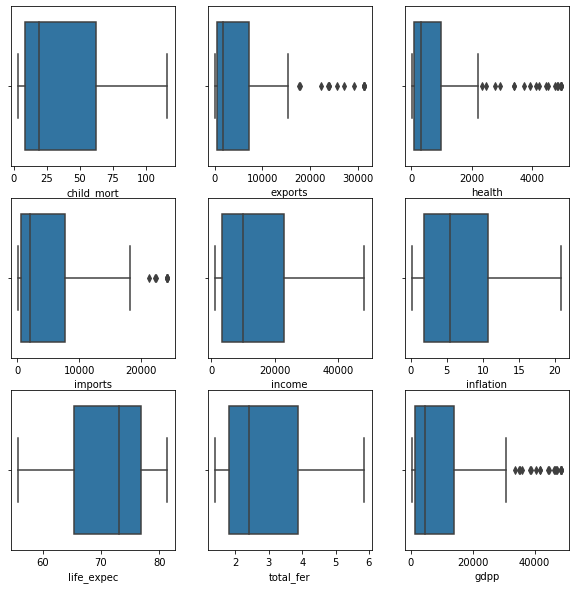

In [17]:
plt.figure(figsize=(10,10))
for i,j in enumerate(var):
    plt.subplot(3,3,i+1)
    sns.boxplot(Countries[j])
plt.show() 

Still we could see some outliers, and these can be formed into a cluster 

In [18]:
# Dropping the country column for calculating and visualising the features for variation and correlation.
Countries_scaler1=Countries.drop("country",axis=1)

#### Checking for the variance of the columns...

In [19]:
# Check the current variance of each column
round(100*Countries_scaler1.var()/sum(Countries_scaler1.var()),4)

child_mort     0.0002
exports       12.9500
health         0.3716
imports        7.8851
income        38.3854
inflation      0.0000
life_expec     0.0000
total_fer      0.0000
gdpp          40.4077
dtype: float64

From the above results we can understand there is variance for gdpp, exports and income columns ...

#### Pairplot to know the variance of the features...

<Figure size 2160x1440 with 0 Axes>

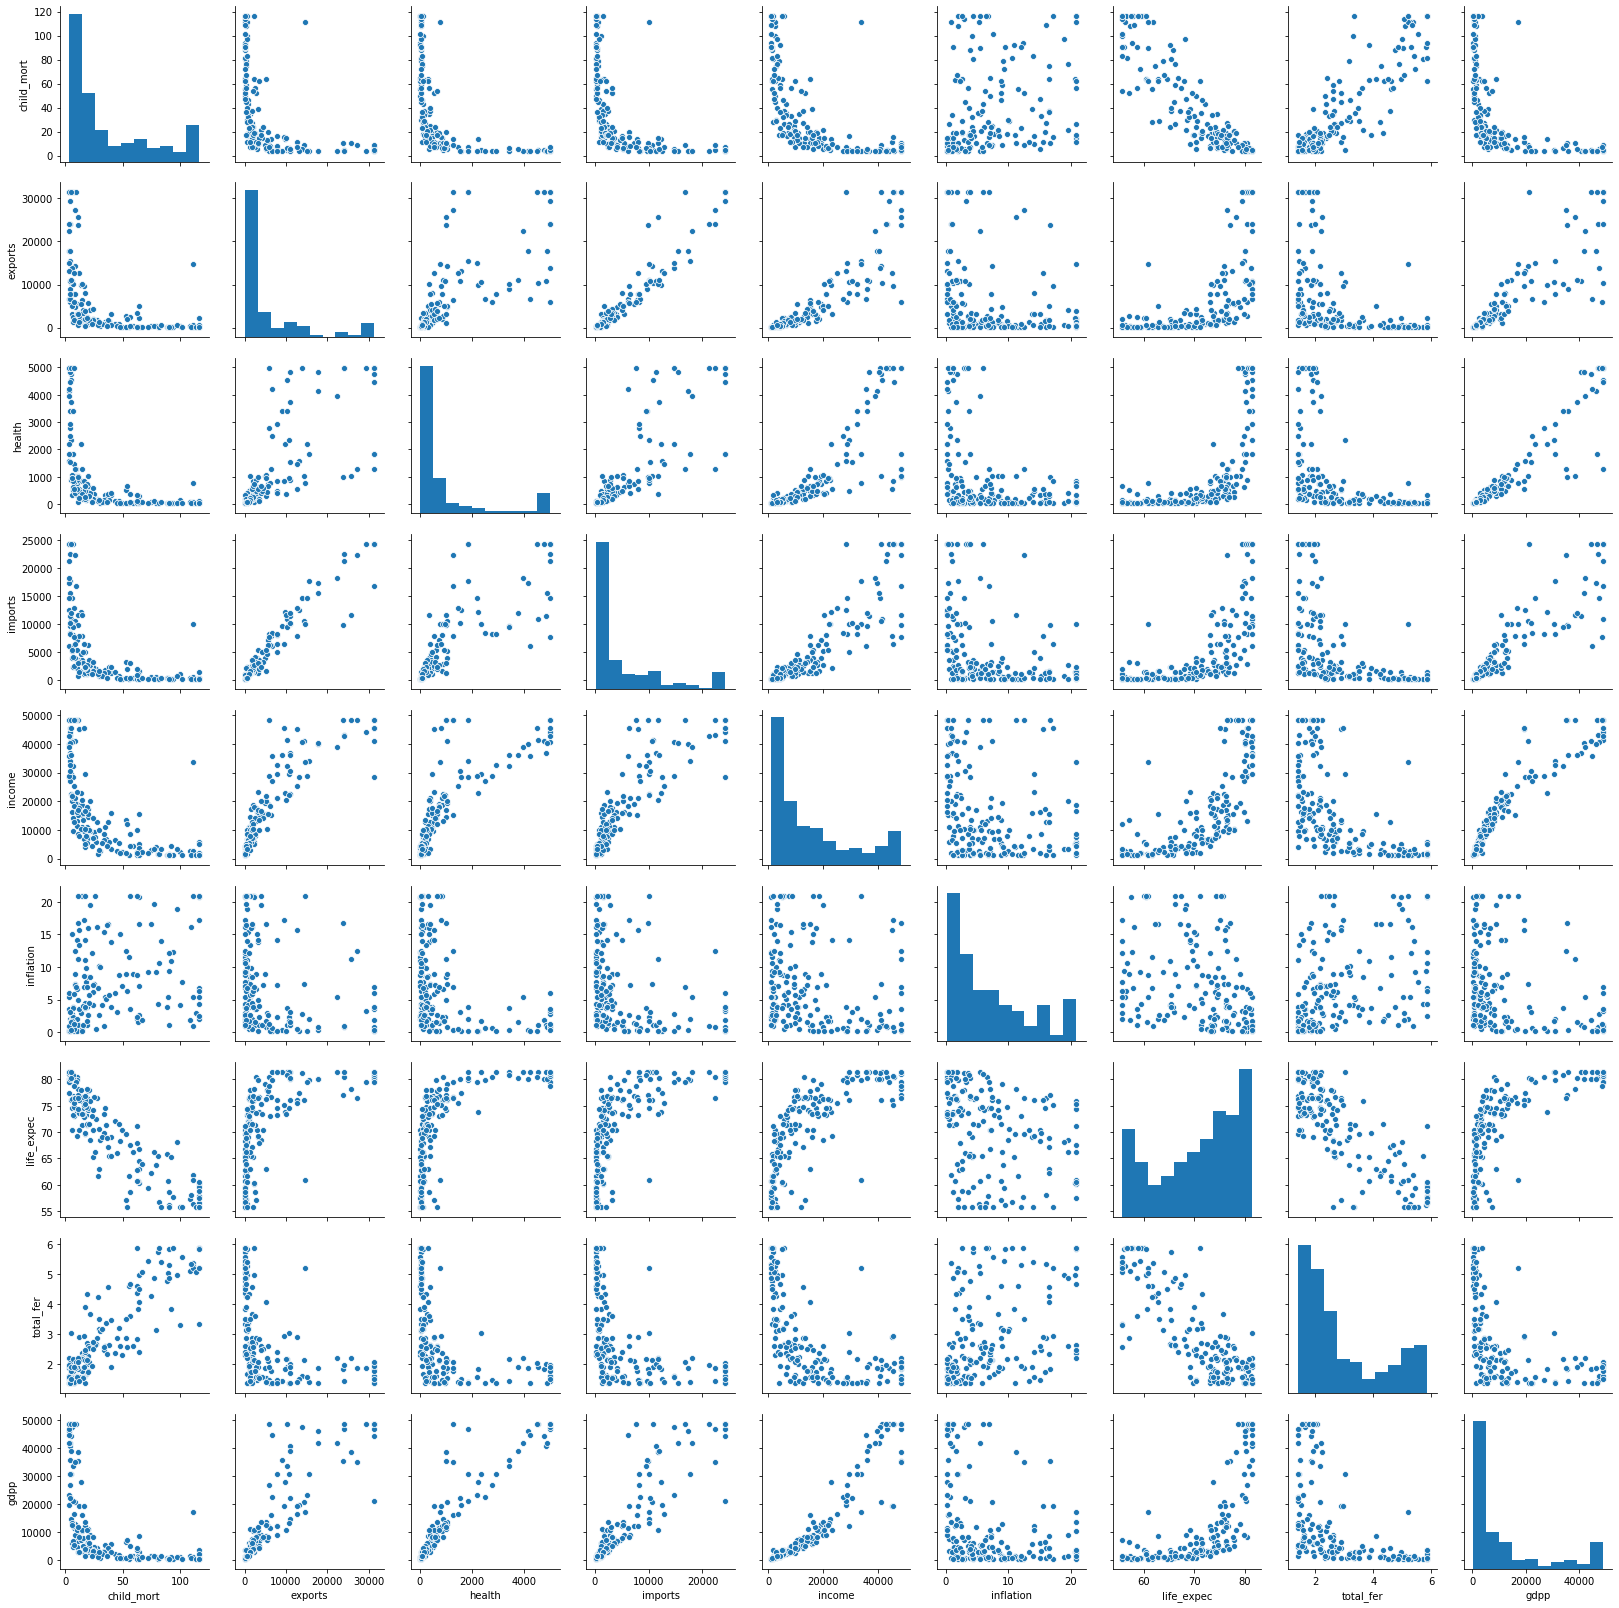

In [20]:
# Pairplot for the numerical columns
plt.figure(figsize=(30,20))
sns.pairplot(Countries_scaler1)
plt.show()

We could see the variance between the features like gdpp and income and exports ...

####  Plotting Heat Map

(9.5, -0.5)

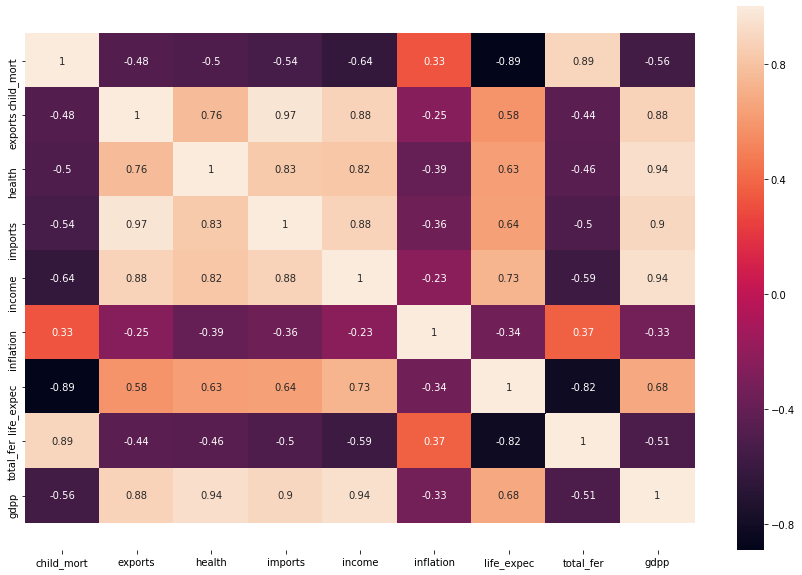

In [21]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(Countries_scaler1.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We could see correlation between variables like total fertility and child mortality and exports and imports and income- life_expec etc...all these correlation need to be handled.

### Scaling the data...

In [22]:
# Using Standard scaler to standardise the data..
scaler=StandardScaler()
Countries_Scaler=scaler.fit_transform(Countries_scaler1)

### Applying PCA on the data...

In [23]:
# Defining the PCA and applying on the data...
pca = PCA(svd_solver = 'randomized',random_state=42)
pca.fit(Countries_Scaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
# components of the pca...
pca.components_

array([[-0.31370269,  0.3507987 ,  0.35117815,  0.36823124,  0.37600029,
        -0.17399218,  0.34308686, -0.29811056,  0.37600871],
       [ 0.48684113,  0.33097569,  0.24315695,  0.26930019,  0.16807187,
         0.20045729, -0.34450382,  0.51847097,  0.25664488],
       [-0.17763592,  0.06865384, -0.13607851, -0.04200452,  0.17010197,
         0.93794124,  0.15426058, -0.10473969, -0.00389912],
       [ 0.02276945, -0.53686278,  0.64515576, -0.38273615,  0.01264167,
         0.10608158,  0.18223721,  0.15311285,  0.28368985],
       [ 0.12839534, -0.08487856,  0.20033804, -0.04421243,  0.07457851,
         0.07932579, -0.67371553, -0.67970463,  0.08046529],
       [ 0.1076401 , -0.12068475, -0.4231057 , -0.38460027,  0.74879481,
        -0.17145666, -0.03640109,  0.06088361,  0.22757439],
       [-0.77529381, -0.03982588,  0.0371735 ,  0.00485008,  0.05733254,
        -0.02440683, -0.50118517,  0.37360537,  0.03574582],
       [-0.05482803,  0.44271452, -0.15457504, -0.49759106, -0

#### Understanding the variance of pca components...

In [25]:
# Variance of each PC component...
pca.explained_variance_ratio_

array([0.68508868, 0.14727819, 0.09507098, 0.03147493, 0.01636993,
       0.0119143 , 0.00890517, 0.00252245, 0.00137538])

In [26]:
# Taking the cumulative sum of the explained variance ratio in to a variable...
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)

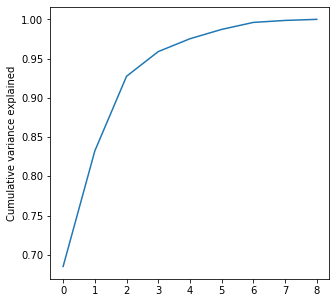

In [27]:
# Visualizing the  Cumulative Variance of the PCA components...
fig = plt.figure(figsize=[5,5])
plt.plot(cumulative_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

From the graph the first 4 components are explaining about 95% of variance of the dataeset.

In [28]:
# The first 4 components explains the max variance 95%
pca_final = IncrementalPCA(n_components=4)
Countries_pca = pca_final.fit_transform(Countries_Scaler)
Countries_pca.shape

(167, 4)

In [29]:
# Checking for the correlation of the PCA dataset
corrmat = np.corrcoef(Countries_pca.transpose())
corrmat.shape

(4, 4)

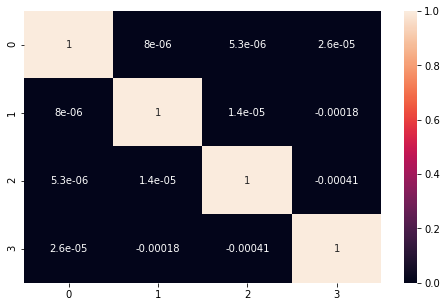

In [30]:
# Plotting heatmap...
plt.figure(figsize=[8,5])
sns.heatmap(corrmat, annot=True)

Now the Correlation between the variables is almost 0 and the dimensionality of the dataset is almost reduced to 4 components.

In [31]:
# Labeling the dataset after performing PCA... 
Countries_pca = pd.DataFrame(Countries_pca)
Countries_pca.columns=['PC1','PC2','PC3','PC4']
Countries_pca.head()

,PC1,PC2,PC3,PC4
0,-3.131872,1.546674,-0.481267,0.055881
1,-0.131785,-1.671799,-0.100328,-0.049290
2,-0.741069,-0.691548,1.551504,0.272454
3,-3.160909,2.351136,1.228481,0.249862
4,0.946293,-1.001889,-0.489047,-0.249619


#### Explaining the features on the PC components

In [32]:
# Checking which attributes are well explained by the pca components

features = list(Countries_scaler1.columns)
features_pca = pd.DataFrame({'Features':features,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})

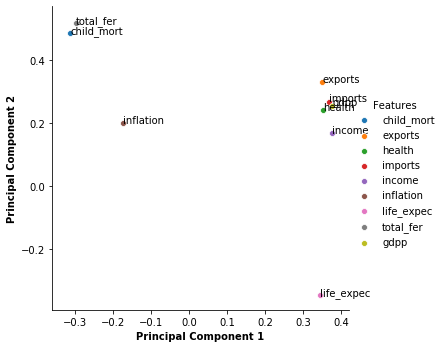

In [33]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=features_pca, x_vars=["PC1"], y_vars=["PC2"], hue = "Features" ,height=5)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(features_pca.Features):
    plt.annotate(txt, (features_pca.PC1[i],features_pca.PC2[i]))

 - Life expectency, income, gdpp,imports, exports and health are very well explained by PC1.
 - Child mortality and total fertility are well explained by PC2.
 - Inflation is neither explained by PC1 nor with PC2

#### Scatter Plot between PC1 and PC2 to understand the formation of grouping.

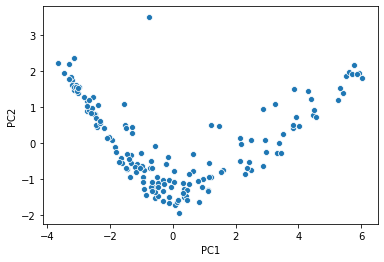

In [34]:
sns.scatterplot(x ='PC1', y = 'PC2',data = Countries_pca,legend='full')

The grouping formed before and after x=0 is clearly visible.

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
hopkins(Countries_pca)

0.8043322947240371

Hopkins test gives a good result meaning there is a good tendency for clustering.

###  KMeans Clustering...

#### Plotting  Elbow Curve...

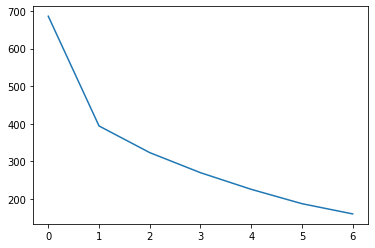

In [37]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,random_state=0, max_iter=50)
    kmeans.fit(Countries_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

3 clusters would give the better result as 2 is not right choice.

#### Silhouette analysis...

In [38]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=0, max_iter=50)
    kmeans.fit(Countries_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Countries_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5058325310521449
For n_clusters=3, the silhouette score is 0.4504499169269988
For n_clusters=4, the silhouette score is 0.40415848999572274
For n_clusters=5, the silhouette score is 0.38123534050742713
For n_clusters=6, the silhouette score is 0.3786462004536795
For n_clusters=7, the silhouette score is 0.3817509220446484
For n_clusters=8, the silhouette score is 0.37282260468272166


 From the Elbow curve and Silhouette analysis 3 clusters would give best results...

In [39]:
# K-means with n-clusters = 3...
kmeans = KMeans(n_clusters=3,random_state=0, max_iter=50)
kmeans.fit(Countries_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [40]:
# Finding the labels after clustering...
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [41]:
# Lets add the cluster id's to the PCA data...
Countries_pca['Cluster_ID'] = kmeans.labels_
Countries_pca.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-3.131872,1.546674,-0.481267,0.055881,0
1,-0.131785,-1.671799,-0.100328,-0.049290,2
2,-0.741069,-0.691548,1.551504,0.272454,2
3,-3.160909,2.351136,1.228481,0.249862,0
4,0.946293,-1.001889,-0.489047,-0.249619,2


#### Visualising the clusters on the PC components...

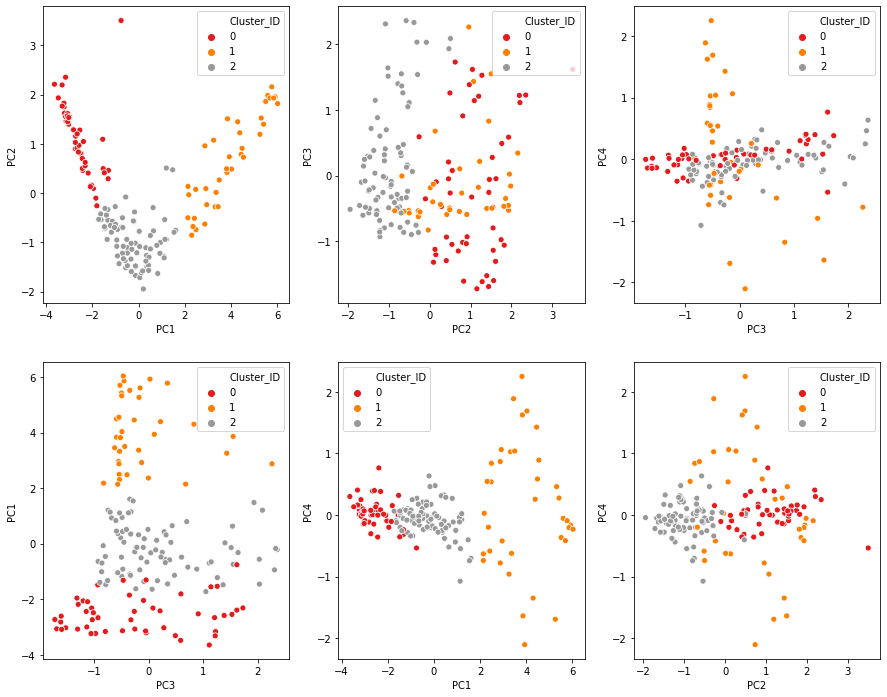

In [42]:
# Visualising the clusters by scatter plot...
fig, axes = plt.subplots(2,3, figsize=(15,12))
sns.scatterplot(x ='PC1', y = 'PC2',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x ='PC2', y = 'PC3',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x ='PC3', y = 'PC4',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[0][2])
sns.scatterplot(x ='PC3', y = 'PC1',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[1][0])
sns.scatterplot(x ='PC1', y = 'PC4',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[1][1])
sns.scatterplot(x ='PC2', y = 'PC4',hue='Cluster_ID',data = Countries_pca,legend='full',palette="Set1",ax=axes[1][2])

In [43]:
# Value-counts of the clusters...
Countries_pca['Cluster_ID'].value_counts()

2    81
0    49
1    37
Name: Cluster_ID, dtype: int64

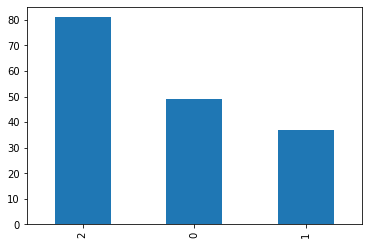

In [44]:
# Check the count of observation per cluster
Countries_pca['Cluster_ID'].value_counts().plot(kind = 'bar')

Under Developed countries are under cluster 0 , Developed countries are under cluster 1 and Developing countries are under cluster 2.

### KMeans Cluster Profiling...

In [45]:
Countries_scaler1['country']=Countries['country']

In [46]:
Countries_scaler1['Cluster_ID']=Countries_pca['Cluster_ID']

In [47]:
Countries_scaler1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster_ID
0,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,Afghanistan,0
1,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,Albania,2
2,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,Algeria,2
3,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,Angola,0
4,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,Antigua and Barbuda,2


In [48]:
# Fetching the values of columns in the data frame...
Countries_scaler1.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'country', 'Cluster_ID'],
      dtype='object')

In [49]:
# lets take mean of the features we want to analyse with , these would be helpful for cluster analysis
Mean_child_mort=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).child_mort.mean())
Mean_income=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).income.mean())
Mean_gdpp=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).gdpp.mean())                

In [50]:
# Preparing the final Dataset with the required features for different clustering...
Countries_Mean = pd.concat([pd.Series([0,1,2]),Mean_child_mort,Mean_income,Mean_gdpp], axis=1)
Countries_Mean.columns = ["Cluster_ID", "child_mort","income","gdpp"]
Countries_Mean

,Cluster_ID,child_mort,income,gdpp
0,0,85.748980,3917.897959,1901.981633
1,1,5.344324,38711.081081,37745.675676
2,2,21.575309,12430.617284,6355.975309


#### Visualisation of gdpp,income and child mort features for each cluster...

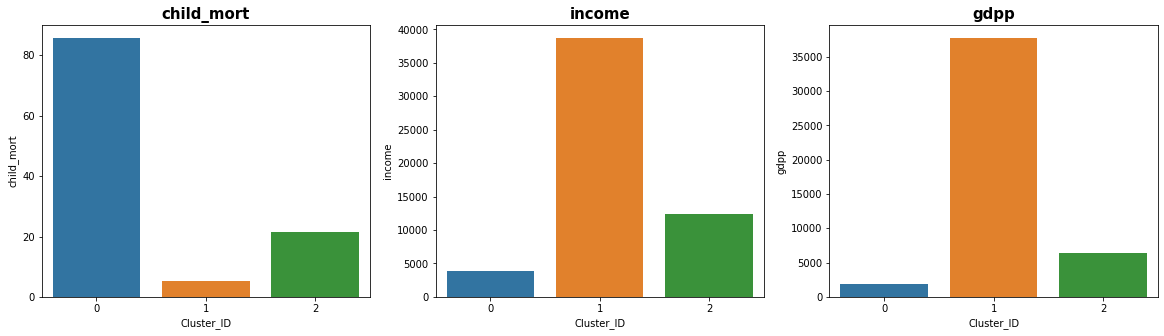

In [51]:
# lets visualise the cluster formed
var=[ "child_mort","income","gdpp"]
fig= plt.figure(figsize = (20,5))

for i,col in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.barplot(x=Countries_Mean.Cluster_ID, y=Countries_Mean[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    
plt.show()

Insight: 'Cluster 0' is categorized as Under Developed Countries segment  with high child mortality less income and less gdpp.

#### Visualisation of gdpp,income and child mort features for each cluster...

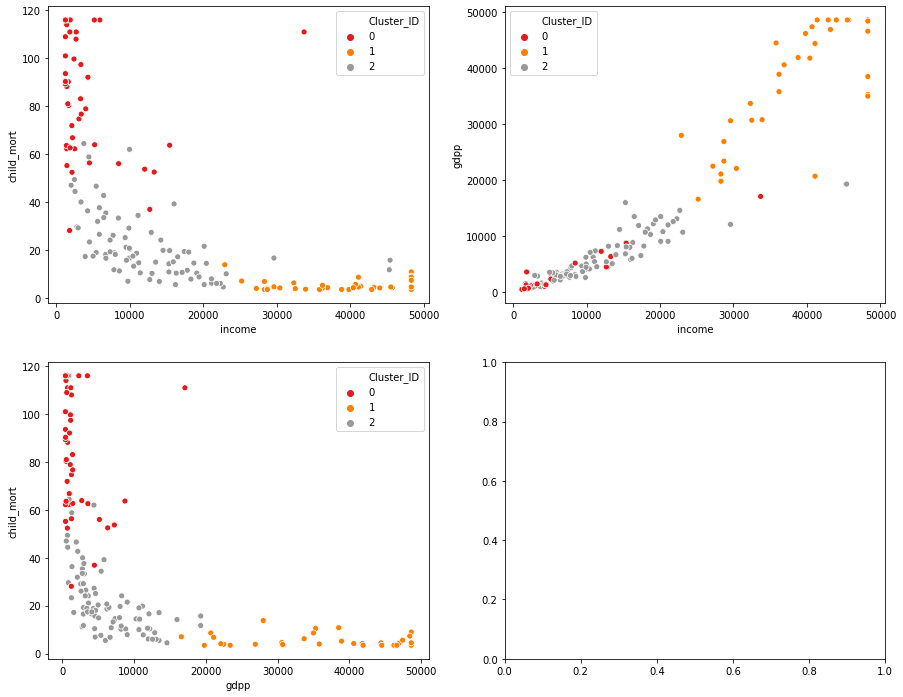

In [52]:
# Visualising the clusters by scatter plot...
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x ='income', y = 'child_mort',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x ='income', y = 'gdpp',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x ='gdpp', y = 'child_mort',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[1][0])


#### Here are the countries which are under cluster 0:

In [53]:
Countries_Kmeans=Countries_scaler1.groupby('Cluster_ID').get_group(0)
Countries_Kmeans['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

#### The list of 10 countries from cluster of underdeveloped countries which are under developed based on gdpp and income...

In [54]:
Countries_Kmeans.sort_values(['gdpp','income'],ascending=True).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster_ID
26,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,Burundi,0
31,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,Central African Republic,0
37,116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,"Congo, Dem. Rep.",0
88,89.3,70.4688,38.58600,302.802,1213.0,5.47,60.80,5.020,465.9,Liberia,0
94,90.5,104.6520,30.24810,169.281,1213.0,12.10,55.78,5.310,465.9,Malawi,0
106,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,Mozambique,0
112,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,Niger,0
132,116.0,70.4688,52.26900,169.281,1220.0,17.20,55.78,5.200,465.9,Sierra Leone,0
93,62.2,103.2500,26.71592,177.590,1390.0,8.79,60.80,4.600,465.9,Madagascar,0
50,55.2,70.4688,26.71592,169.281,1420.0,11.60,61.70,4.610,482.0,Eritrea,0


<b>Burundi, CentralAfrican Republic, Congo, Liberia, Malawi, Mozambique, Niger, Sierra Leone, Madagascar, Eritrea are first 10 countries which require financial aid.</b>

###  Hierarchical clustering(both single and complete linkage) 

In [55]:
# Checking for the proper dataset...
Countries_pca.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-3.131872,1.546674,-0.481267,0.055881,0
1,-0.131785,-1.671799,-0.100328,-0.049290,2
2,-0.741069,-0.691548,1.551504,0.272454,2
3,-3.160909,2.351136,1.228481,0.249862,0
4,0.946293,-1.001889,-0.489047,-0.249619,2


In [56]:
# Dropping the cluster-id column which was added when Kmeans fitting...
Countries_pca.drop('Cluster_ID',axis=1,inplace=True)

#### Single linkage...

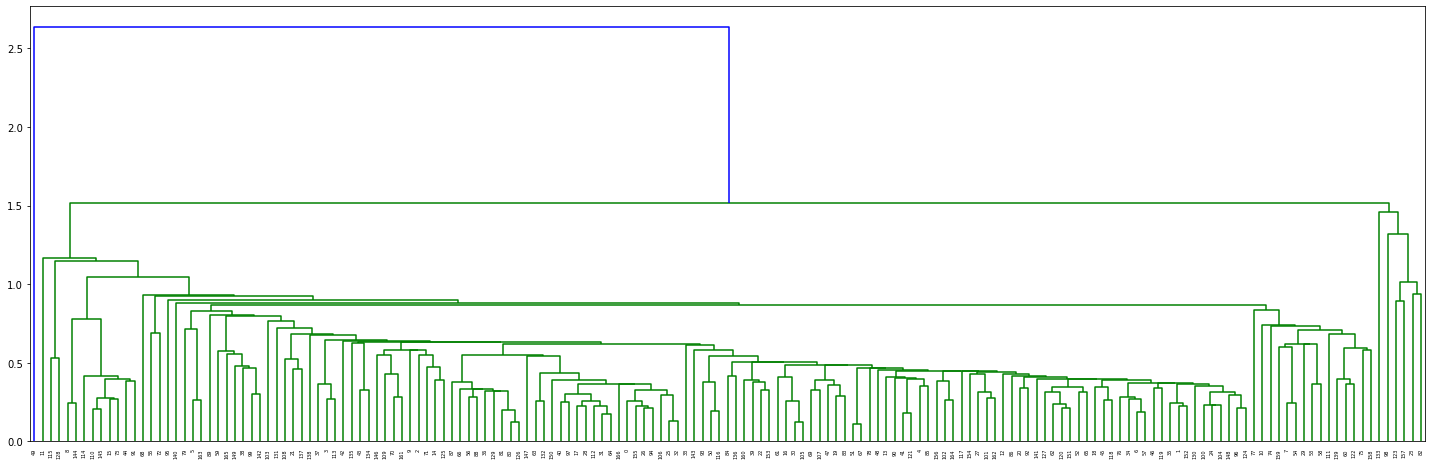

In [57]:
# single linkage
plt.figure(figsize=[25,8])
mergings = linkage(Countries_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
# 10 clusters
cluster_labels = cut_tree(mergings, n_clusters=10).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 7, 0, 0, 0,
       0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
Countries_pca['Cluster_ID'] = cluster_labels
Countries_pca['Cluster_ID'].value_counts()

0    148
1      9
8      2
7      2
9      1
6      1
5      1
4      1
3      1
2      1
Name: Cluster_ID, dtype: int64

From the above cluster labels , even by taking 10 clusters we couldnot see proper segmentation so let us do Complete Linkage and check.

### Complete Linkage...

In [60]:
# Dropping the cluster id column
Countries_pca.drop('Cluster_ID',axis=1,inplace=True)

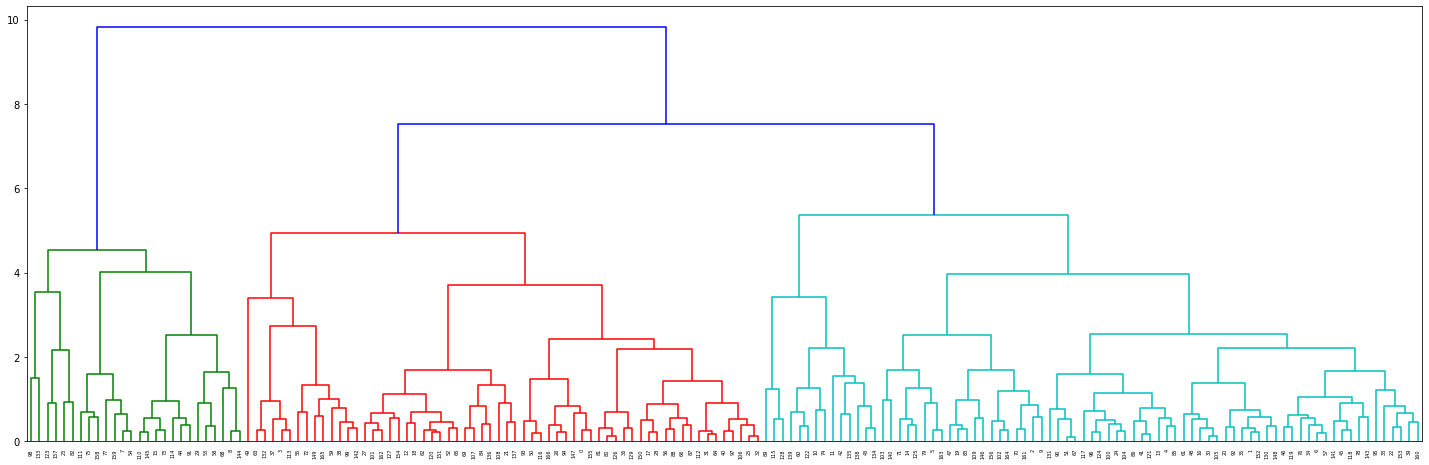

In [61]:
# complete linkage
plt.figure(figsize=[25,8])
mergings = linkage(Countries_pca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [62]:
# From the above dendrogram it is clear that we can do 5 segmentations...
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 3, 3, 1, 4, 4, 0, 1, 1, 3, 1, 0, 0, 1, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 4, 4,
       3, 1, 1, 1, 1, 2, 0, 1, 0, 3, 3, 2, 0, 1, 3, 2, 4, 1, 0, 2, 0, 0,
       0, 1, 3, 0, 1, 1, 2, 3, 4, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 4, 1, 3, 1, 0, 0, 1, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       3, 3, 0, 2, 3, 4, 0, 1, 1, 1, 0, 1, 4, 3, 1, 1, 0, 0, 4, 0, 1, 1,
       2, 3, 4, 4, 0, 0, 4, 4, 1, 1, 2, 1, 3, 3, 1, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 3, 3, 3, 1, 1, 0, 1, 1, 2, 0])

In [63]:
Countries_pca['Cluster_ID'] = cluster_labels
Countries_pca['Cluster_ID'].value_counts()

1    65
0    48
3    26
4    14
2    14
Name: Cluster_ID, dtype: int64

### Hierarchical  Cluster Profiling...(Complete Linkage...)

In [64]:
# Preparing scaled dataframe for clustering..
Countries_scaler1.drop('Cluster_ID',axis=1,inplace=True)
Countries_scaler1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,Afghanistan
1,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,Albania
2,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,Algeria
3,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,Angola
4,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,Antigua and Barbuda


In [65]:
# Attaching the Hierarchical cluster id labels to the dataframe...
Countries_scaler1['Cluster_ID']=Countries_pca['Cluster_ID']
Countries_scaler1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster_ID
0,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,Afghanistan,0
1,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,Albania,1
2,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,Algeria,1
3,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,Angola,2
4,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,Antigua and Barbuda,1


#### Visualising the formed clusters...

In [66]:
# lets take mean of the features we want to analyse with , these would be helpful for cluster analysis
Mean_child_mort=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).child_mort.mean())
Mean_income=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).income.mean())
Mean_gdpp=pd.DataFrame(Countries_scaler1.groupby(['Cluster_ID']).gdpp.mean()) 

In [67]:
# Preparing the final Dataset with the required features for different clustering...
Countries_Mean = pd.concat([pd.Series([0,1,2,3,4]),Mean_child_mort,Mean_income,Mean_gdpp], axis=1)
Countries_Mean.columns = ["Cluster_ID", "child_mort","income","gdpp"]
Countries_Mean

,Cluster_ID,child_mort,income,gdpp
0,0,72.693750,3410.854167,1625.235417
1,1,18.458462,12570.307692,6613.692308
2,2,86.871429,6983.285714,3530.700000
3,3,5.289231,42454.230769,43249.615385
4,4,7.444286,32057.142857,23057.142857


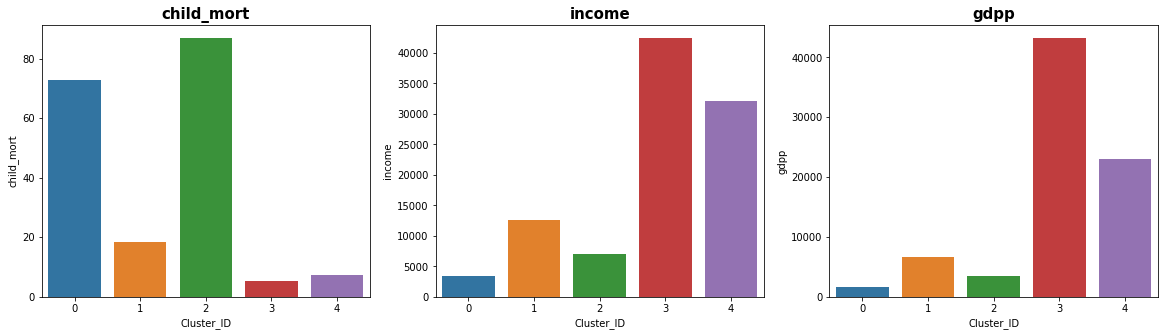

In [68]:
# lets visualise the cluster formed
var=[ "child_mort","income","gdpp"]
fig= plt.figure(figsize = (20,5))

for i,col in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.barplot(x=Countries_Mean.Cluster_ID, y=Countries_Mean[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    
plt.show()

 Cluster 0 is the segmentation of underdeveloped countries with high child mortality rate and less income and less gdpp.

#### Visualisation of gdpp,income and child mort features for each cluster...

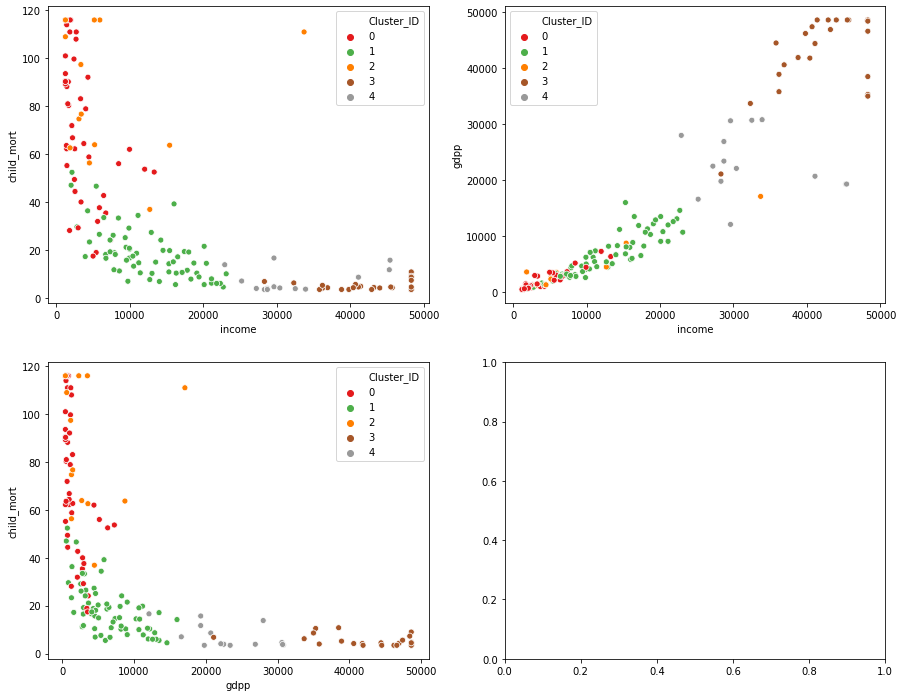

In [69]:
# Visualising the clusters by scatter plot...
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x ='income', y = 'child_mort',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x ='income', y = 'gdpp',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x ='gdpp', y = 'child_mort',hue='Cluster_ID',data = Countries_scaler1,legend='full',palette="Set1",ax=axes[1][0])


#### List of under developed countries... 

In [70]:
Countries_Hier=Countries_scaler1.groupby('Cluster_ID').get_group(0)
Countries_Hier

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster_ID
0,90.2,70.4688,41.91740,248.297,1610.0,9.440,56.20,5.820,553.0,Afghanistan,0
12,49.4,121.2800,26.71592,169.281,2440.0,7.140,70.40,2.330,758.0,Bangladesh,0
17,111.0,180.4040,31.07800,281.976,1820.0,0.885,61.80,5.360,758.0,Benin,0
18,42.7,926.5000,113.36000,1541.260,6420.0,5.990,72.10,2.380,2180.0,Bhutan,0
21,52.5,2768.6000,527.05000,3257.550,13300.0,8.920,57.10,2.880,6350.0,Botswana,0
25,116.0,110.4000,38.75500,170.200,1430.0,6.810,57.90,5.861,575.0,Burkina Faso,0
26,93.6,70.4688,26.79600,169.281,1213.0,12.300,57.70,5.861,465.9,Burundi,0
27,44.4,425.2260,44.64480,467.670,2520.0,3.120,66.10,2.880,786.0,Cambodia,0
28,108.0,290.8200,67.20300,353.700,2660.0,1.910,57.30,5.110,1310.0,Cameroon,0
31,116.0,70.4688,26.71592,169.281,1213.0,2.010,55.78,5.210,465.9,Central African Republic,0


#### The list of 10 countries from cluster of underdeveloped countries which are under developed based on gdpp and income...

In [71]:
Countries_Hier.sort_values(['gdpp','income'],ascending=True).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster_ID
26,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,Burundi,0
31,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,Central African Republic,0
88,89.3,70.4688,38.58600,302.802,1213.0,5.47,60.80,5.020,465.9,Liberia,0
94,90.5,104.6520,30.24810,169.281,1213.0,12.10,55.78,5.310,465.9,Malawi,0
106,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,Mozambique,0
112,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,Niger,0
93,62.2,103.2500,26.71592,177.590,1390.0,8.79,60.80,4.600,465.9,Madagascar,0
50,55.2,70.4688,26.71592,169.281,1420.0,11.60,61.70,4.610,482.0,Eritrea,0
150,90.3,196.1760,37.33200,279.624,1213.0,1.18,58.70,4.870,488.0,Togo,0
64,114.0,81.5030,46.49500,192.544,1390.0,2.97,55.78,5.050,547.0,Guinea-Bissau,0


<b>Burundi, CentralAfrican Republic, Liberia, Malawi, Mozambique, Niger, Madagascar, Eritrea, Togo, Guinea-Bissau are first 10 countries which require financial aid.<b/>

### Conclusion: The first 5 countries which need the aid :
 - Burundi
 - Central African Republic
 - Congo
 - Liberia
 - Malawi
 
#### The next 5 countries which require  aid :

 - Mozambique
 - Niger
 - Sierra Leone
 - Madagascar
 - Eritrea
 

#### K means and hierarchical has given almost similar results for the countries which require the aid but segmentation wise K Means has given the better results than Heirarchical clustering.